In [2]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

def read_exp(fname):
    params = {
        "base": "",
        "ants": 0,
        "iter": 0,
        "evap": 0,
        "alpha": 0,
        "beta": 0,
        "n": 0 
    }

    with open(fname, "r") as f:
        lines = f.readlines()

        params["base"] = lines[0].strip().split(" ")[-1].split("/")[-1]
        params["n"] = int(lines[1].strip().split(" ")[-1])
        params["ants"] = int(lines[3].strip().split(" ")[-1])
        params["iter"] = int(lines[4].strip().split(" ")[-1])
        params["evap"] = float(lines[5].strip().split(" ")[-1])
        params["alpha"] = int(lines[6].strip().split(" ")[-1])
        params["beta"] = int(lines[7].strip().split(" ")[-1])

        results = lines[8:]

        doing = np.zeros(params["n"])

        all_solutions = np.zeros([params["n"], params["iter"], params["ants"]])
        mean_phero = np.zeros([params["n"], params["iter"]])

        err = 0
        for line in results:
            if "START_NODE" in line:
                try:
                    p,s = line.strip().split(":")
                except:
                    err+=1
                    continue
        
                    
                _, START_NODE, _ , ITER,_ , MEAN_PHERO = p.strip().split(" ")
            
                ITER = int(ITER)    
                START_NODE = int(START_NODE)
                MEAN_PHERO = float(MEAN_PHERO)

                doing[int(START_NODE)] = 1

                mean_phero[START_NODE, ITER] = MEAN_PHERO
                all_solutions[START_NODE, ITER] = np.fromstring(s.strip(), sep=' ')

        mean_phero[mean_phero == 0] = np.nan   
        all_solutions[all_solutions == 0] = np.nan

        mean_fig, mean_ax = plt.subplots(figsize=[8,4]) ## Create Figure

        mean1 = np.nanmean(all_solutions, axis=2)
        mean2 = np.nanmean(mean1, axis=0)
        
        max1 = np.nanmax(all_solutions, axis=2)
        max2 = np.nanmax(max1, axis=0)

        min1 = np.nanmin(all_solutions, axis=2)
        min2 = np.nanmin(min1, axis=0)

        mean_ax.plot(mean2, label="mean", color="b")
        mean_ax.plot(max2, label="max", color="g")
        mean_ax.plot(min2, label="min", color="r")

        mean_ax.set_title("Best, Mean and Worse values for each Ant")
        mean_ax.set_xlabel("Iteration")
        mean_ax.set_ylabel("Solution Value")

        mean_ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        mean_fig.tight_layout()
        plt.show()

        print("Best Results: ", results[-1])
        print("Solution: ", results[-2])

In [3]:
%cd /content
!git clone https://github.com/felipecadar/AntColonyOptimization-CUDA.git
%cd AntColonyOptimization-CUDA/

/content
Cloning into 'AntColonyOptimization-CUDA'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 148 (delta 71), reused 122 (delta 45), pack-reused 0
Receiving objects: 100% (148/148), 8.91 MiB | 6.12 MiB/s, done.
Resolving deltas: 100% (71/71), done.
/content/AntColonyOptimization-CUDA


In [16]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4 (delta 2), reused 4 (delta 2), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/felipecadar/AntColonyOptimization-CUDA
   cbf765c..5f46908  main       -> origin/main
Updating cbf765c..5f46908
Fast-forward
 cuda_implementation/aco_reduced.cu | 28 ++++++++++++++--------------
 1 file changed, 14 insertions(+), 14 deletions(-)


In [17]:
!make; mkdir -p results;

nvcc cuda_implementation/aco_full.cu -O3 -o ACO_full --std=c++11  -Xcompiler -fopenmp
nvcc cuda_implementation/aco_reduced.cu -O3 -o ACO_red --std=c++11


In [19]:
#./ACO_red <Input> <Iter> <Ants> <Evaporation> <Alpha> <Beta> [exp_name]
!./ACO_red bases_grafos/entrada3.txt 20 200 0.2 1 2 test

--------------- Config ---------------
Database:         bases_grafos/entrada3.txt
N Vertex:         1000
N Edges:          499500
N Ants:           200
Max Iterations:   20
Evaportation:     0.2
alpha:            1
beta:             2
Exp:              test
--------------------------------------

[0] Best sum: 7942 - Time difference = 4590[ms]
[1] Best sum: 8530 - Time difference = 4374[ms]
[2] Best sum: 8623 - Time difference = 4380[ms]
[3] Best sum: 8681 - Time difference = 4376[ms]
[4] Best sum: 8820 - Time difference = 4375[ms]
[5] Best sum: 8820 - Time difference = 4385[ms]
[6] Best sum: 8820 - Time difference = 4387[ms]
[7] Best sum: 8844 - Time difference = 4388[ms]
[8] Best sum: 8896 - Time difference = 4391[ms]
[9] Best sum: 8922 - Time difference = 4390[ms]
[10] Best sum: 8922 - Time difference = 4384[ms]
[11] Best sum: 8954 - Time difference = 4390[ms]
[12] Best sum: 9014 - Time difference = 4388[ms]
[13] Best sum: 9014 - Time difference = 4398[ms]
[14] Best sum: 9014 - Tim

In [20]:
!tail results/test.txt

START_NODE 0 ITER 12 MEAN_PHERO 2.9043e+08 : 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8899 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8941 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8847 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 8887 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 9014 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 8851 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: All-NaN slice encountered
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: All-NaN slice encountered


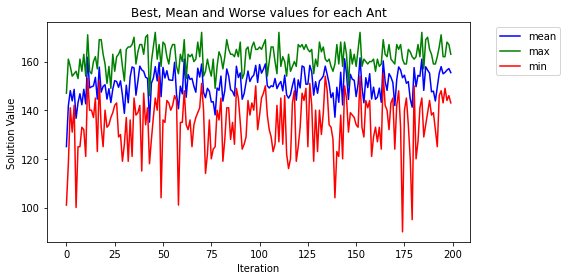

Best Results:  172

Solution:  2 3 6 8 7 11 16 0 18 15 13 19 5 4 14 1 9 10 17 12 



In [7]:
read_exp("results/test.txt")